In [4]:
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures

from plotnine import ggplot, aes, geom_point, geom_line, geom_smooth

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [5]:
penguins = load_penguins()
penguins = penguins.dropna()
X = penguins.drop('bill_length_mm', axis = 1)
y = penguins['bill_length_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)


In [6]:
## Preprocessing One-hot-encode
## Model spec: Linear Regression

lr = LinearRegression()
enc = OneHotEncoder()

ct = ColumnTransformer(
    [('dummify_s', enc, ['species']),
    ('dummify_i', enc, ['island']),
    ('dummify_se', enc, ['sex'])]
)

my_pipeline = Pipeline(
    [('dummify_everything', ct), ('ols', lr)]

)



In [7]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

In [8]:
predict1 = fitted_pipeline.predict(X_test)

df = pd.DataFrame({"y_test": y_test, "predict1": predict1})


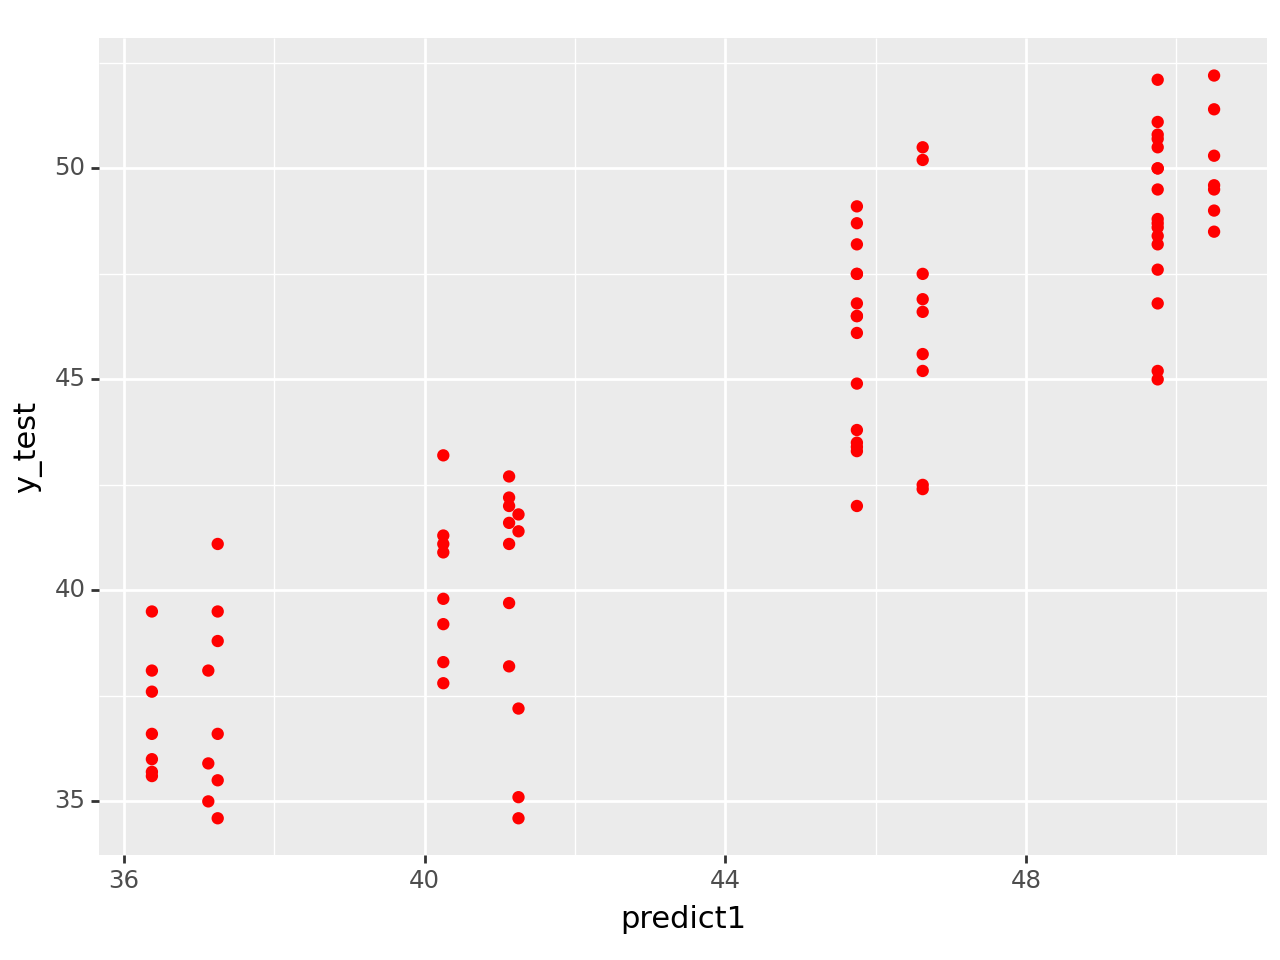

<Figure Size: (640 x 480)>

In [9]:
(ggplot(df)
 + aes(y='y_test')
 + geom_point(aes(x='predict1'), color = 'red')
)

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [59]:
penguins = load_penguins()
penguins = penguins.dropna()
X = penguins[['bill_length_mm']]
y = penguins['bill_depth_mm']

     bill_length_mm
0              39.1
1              39.5
2              40.3
4              36.7
5              39.3
..              ...
339            55.8
340            43.5
341            49.6
342            50.8
343            50.2

[333 rows x 1 columns]
0      18.7
1      17.4
2      18.0
4      19.3
5      20.6
       ... 
339    19.8
340    18.1
341    18.2
342    19.0
343    18.7
Name: bill_depth_mm, Length: 333, dtype: float64


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

## Preprocessing One-hot-encode
## Model spec: Linear

lr = LinearRegression()

my_pipeline1 = Pipeline(
    [('ols', lr)]
)

fitted_pipeline1 = my_pipeline1.fit(X_train, y_train)

predict1 = fitted_pipeline1.predict(X_test)

X_test_model = X_test
X_test_model['predict'] = predict1

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

## Preprocessing One-hot-encode
## Model spec: Quadratic

degree = 2
poly = PolynomialFeatures((1,degree))

ct = ColumnTransformer(
    [('poly', poly, ['bill_length_mm'])]
)

# Create a LinearRegression instance
lr = LinearRegression()

# Create a Pipeline instance
my_pipeline2 = Pipeline(
    [('Square', ct), ('ols', lr)]
)

# Fit the pipeline to the training data and make predictions on the test data
fitted_pipeline2 = my_pipeline2.fit(X_train, y_train)
predict2 = fitted_pipeline2.predict(X_test)

# Add predictions to X_test
X_test_model2 = X_test
X_test_model2['predict'] = predict2


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

## Preprocessing One-hot-encode
## Model spec: Quadratic
degree = 3
poly = PolynomialFeatures((1,degree))

ct = ColumnTransformer(
    [('poly', poly, ['bill_length_mm'])]
)

# Create a LinearRegression instance
lr = LinearRegression()

# Create a Pipeline instance
my_pipeline3 = Pipeline(
    [('Square', ct), ('ols', lr)]
)

# Fit the pipeline to the training data and make predictions on the test data
fitted_pipeline3 = my_pipeline3.fit(X_train, y_train)
predict3 = fitted_pipeline3.predict(X_test)

# Add predictions to X_test
X_test_model3 = X_test
X_test_model3['predict'] = predict3


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

## Preprocessing One-hot-encode
## Model spec: Quadratic
degree = 10
poly = PolynomialFeatures((1,degree))

ct = ColumnTransformer(
    [('poly', poly, ['bill_length_mm'])]
)

# Create a LinearRegression instance
lr = LinearRegression()

# Create a Pipeline instance
my_pipeline4 = Pipeline(
    [('Square', ct), ('ols', lr)]
)

# Fit the pipeline to the training data and make predictions on the test data
fitted_pipeline4 = my_pipeline4.fit(X_train, y_train)
predict10 = fitted_pipeline4.predict(X_test)

# Add predictions to X_test
X_test_model10 = X_test 
X_test_model10['predict'] = predict10

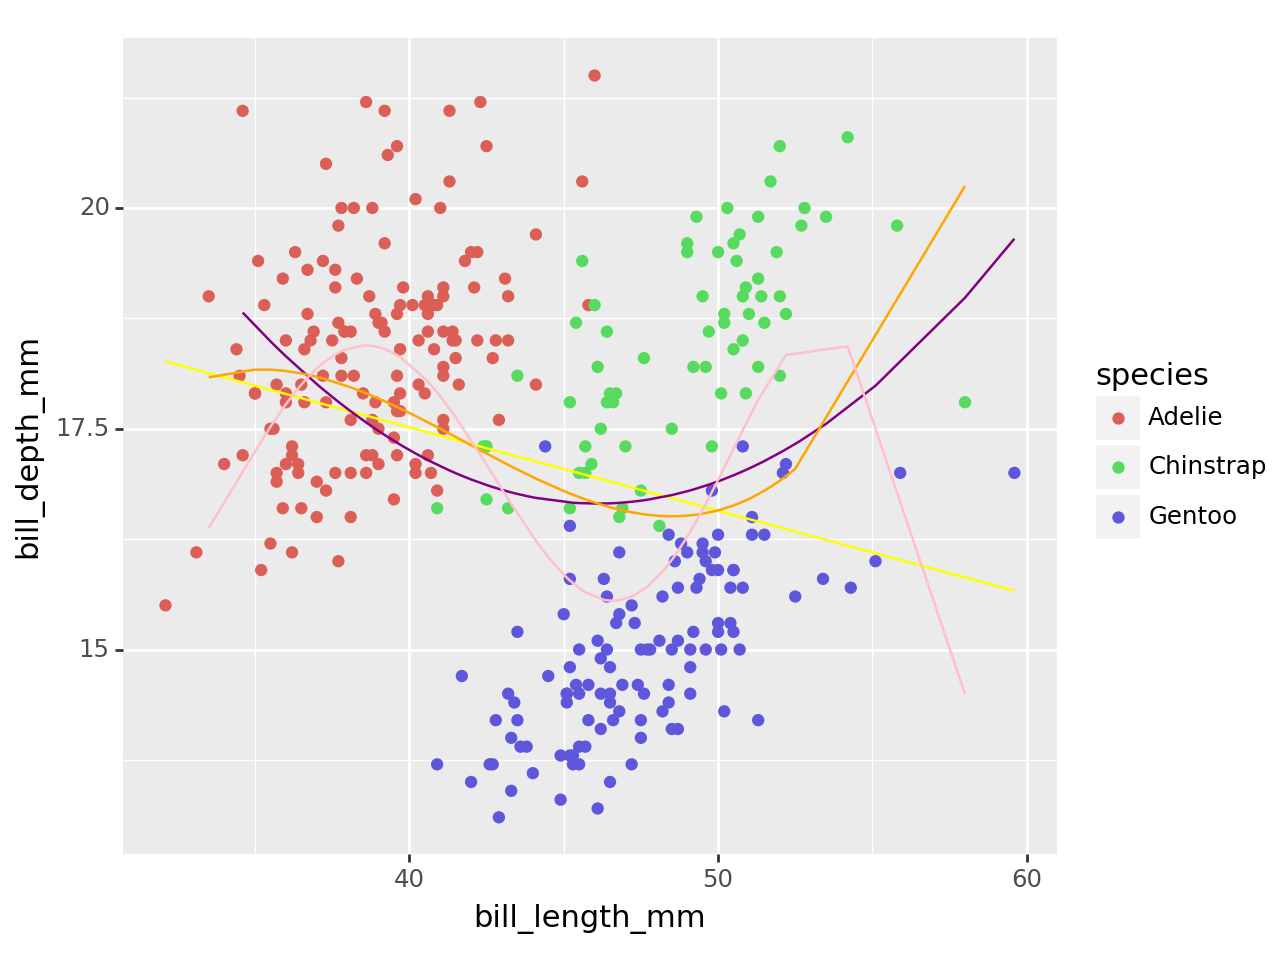

<Figure Size: (640 x 480)>

In [57]:
(ggplot(penguins)
    + aes(y='bill_depth_mm', x='bill_length_mm', color = 'species')
    + geom_point()
    + geom_line(X_test_model, aes(x = 'bill_length_mm', y='predict'), color = 'yellow')
    + geom_line(X_test_model2, aes(x = 'bill_length_mm', y='predict'), color = 'purple')
    + geom_line(X_test_model3, aes(x = 'bill_length_mm', y='predict'), color = 'orange')
    + geom_line(X_test_model10, aes(x = 'bill_length_mm', y='predict'), color = 'pink')
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?

The linear and quadratic models seem to be underfitting as they don't necessarily react to the changes in the data that well menaing that some points are very far from the line.

* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?

The 10 polynomial model is reacting to the data a little too much and sometimes it might give bad predictions because it is trying to fit the model too much and it can shoot over.

* Which of the above models do you think fits the data best and why?

I think the cubic model is a safe bet. It follows the data in a very similar way to the quatratic model, however, it is doing a better job in the extreme ends of bill lnegth.